<a href="https://colab.research.google.com/github/prazad-25/ML_Project/blob/main/final_Heart_Diseases_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.duplicated().sum()

723

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

ds= data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
ds_clean = data.drop_duplicates()
print(ds_clean.shape)

(302, 14)


In [ ]:
ds_clean['target'].value_counts()

,count
target,
1,164
0,138


In [ ]:
confirm = ds_clean[ds_clean.target == 1]
notconf = ds_clean[ds_clean.target == 0]

In [ ]:
print(confirm.shape)
print(notconf.shape)
confirm_sample = confirm.sample(n=138)

(164, 14)
(138, 14)


In [ ]:
ds_clean = pd.concat([confirm_sample,notconf], axis=0)
ds_clean['target'].value_counts()

,count
target,
1,138
0,138


In [ ]:
from sklearn.preprocessing import StandardScaler
X = ds_clean.drop(columns=['target'])
y = ds_clean['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score,f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# SVC Model with Hyperparameter Tuning
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, cv=5)
grid_svc.fit(X_train, y_train)
model1 = grid_svc.best_estimator_
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
r1 = r2_score(y_test, y_pred1)
f1 = f1_score(y_test,y_pred1)


# XGBoost Model with Hyperparameter Tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, refit=True, cv=5)
grid_xgb.fit(X_train, y_train)
model2 = grid_xgb.best_estimator_
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
f2 = f1_score(y_test,y_pred2)

# RandomForest Model with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, refit=True, cv=5)
grid_rf.fit(X_train, y_train)
model3 = grid_rf.best_estimator_
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
r3 = r2_score(y_test, y_pred3)
f3 = f1_score(y_test,y_pred3)

# DecisionTree Model with Hyperparameter Tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, refit=True, cv=5)
grid_dt.fit(X_train, y_train)
model4 = grid_dt.best_estimator_
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
r4 = r2_score(y_test, y_pred4)
f4 = f1_score(y_test,y_pred4)

# GaussianNB Model with Cross-Validation
model5 = GaussianNB(var_smoothing=1e-09)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
r5 = r2_score(y_test, y_pred5)
f5 = f1_score(y_test,y_pred5)

# KNeighborsClassifier Model with Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, cv=5)
grid_knn.fit(X_train, y_train)
model6 = grid_knn.best_estimator_
y_pred6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred6)
r6 = r2_score(y_test, y_pred6)
f6 = f1_score(y_test,y_pred6)

# Output the best parameters for each model
print("Best parameters for SVC:", grid_svc.best_params_)
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best parameters for RandomForest:", grid_rf.best_params_)
print("Best parameters for DecisionTree:", grid_dt.best_params_)
print("Best parameters for KNN:", grid_knn.best_params_)

# Output accuracies and R2 scores
print("SVC Accuracy:", accuracy1, "R2:", r1, "F1:",f1)
print("XGBoost Accuracy:", accuracy2, "R2:", r2, "F1:",f2)
print("RandomForest Accuracy:", accuracy3, "R2:", r3, "F1:",f3)
print("DecisionTree Accuracy:", accuracy4, "R2:", r4, "F1:",f4)
print("GaussianNB Accuracy:", accuracy5, "R2:", r5, "F1:",f5)
print("KNN Accuracy:", accuracy6, "R2:", r6, "F1:",f6)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters for SVC: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best parameters for RandomForest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1}
SVC Accuracy: 0.9107142857142857 R2: 0.6428571428571428 F1: 0.9122807017543859
XGBoost Accuracy: 0.7678571428571429 R2: 0.0714285714285714 F1: 0.7868852459016393
RandomForest Accuracy: 0.8035714285714286 R2: 0.2142857142857143 F1: 0.8135593220338984
DecisionTree Accuracy: 0.6428571428571429 R2: -0.4285714285714286 F1: 0.6875
GaussianNB Accuracy: 0.9285714285714286 R2: 0.7142857142857143 F1: 0.9310344827586207
KNN Accuracy: 0.8035714285714286 R2: 0.2142857142857143 F1: 0.819672131147541


In [ ]:
ds_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
369,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
233,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
536,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
76,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
369,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
203,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
233,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
536,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
76,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


In [ ]:

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2568, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2568, activation='leaky_relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test,y_pred)
f = f1_score(y_test,y_pred)
print(accuracy)
print(f)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6036 - loss: 0.6861
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8135 - loss: 0.6437
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7911 - loss: 0.6308
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7861 - loss: 0.6204
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8068 - loss: 0.6150
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7720 - loss: 0.6259
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8722 - loss: 0.6108
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8188 - loss: 0.6073
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.7738 - loss: 0.6118
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7944 - loss: 0.6097
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7725 - loss: 0.5993
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8033 - loss: 0.5987
Epoc

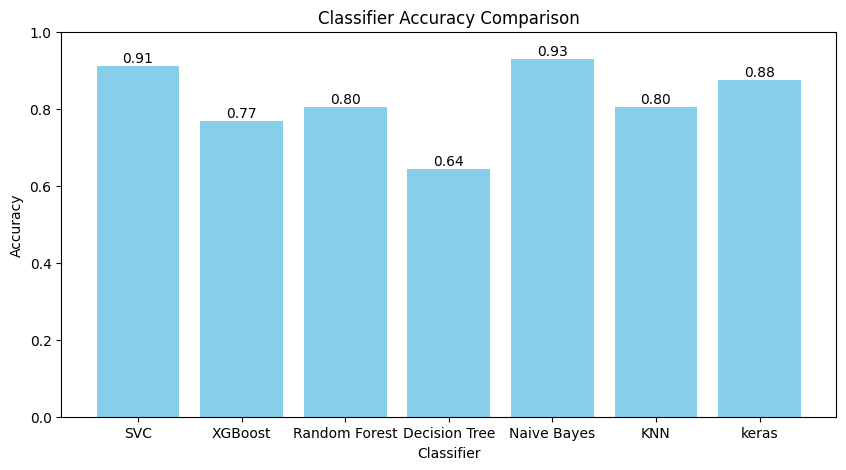

In [ ]:
classifier_names = ['SVC', 'XGBoost', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN',"keras"]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6,accuracy]
r2_scores = [r1, r2, r3, r4, r5, r6]


plt.figure(figsize=(10,5))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim([0, 1])
for i in range(len(classifier_names)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()

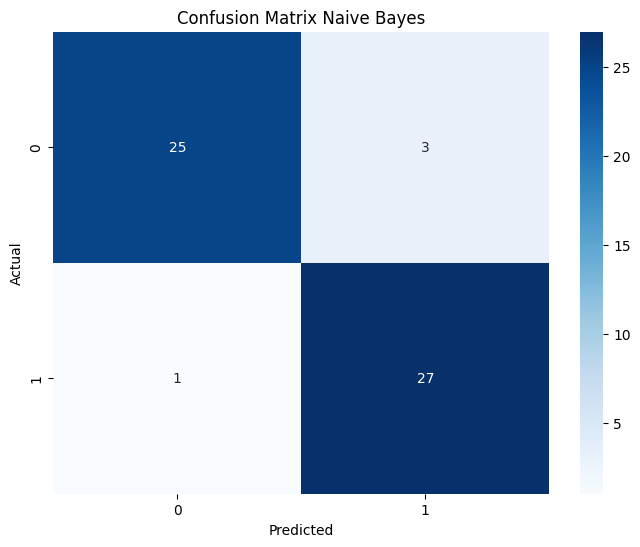

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

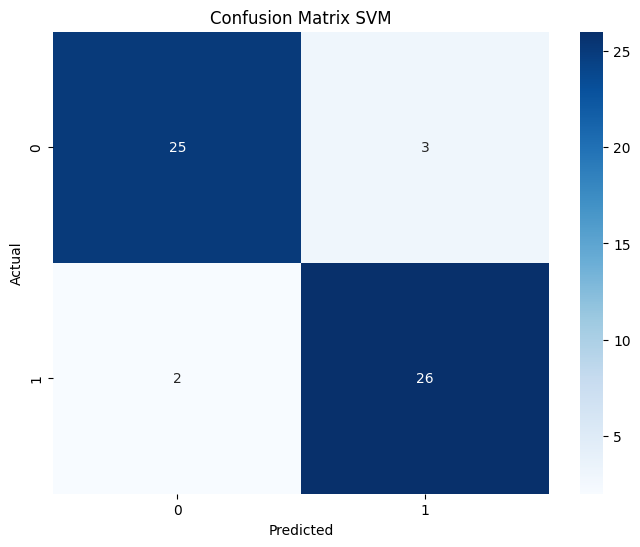

In [ ]:
con_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()